In [1]:
!pip install ultralytics
!pip install -U ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.0/215.0 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 43.6 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab-widgets 3.0.9
    Uninstalling jupyterlab-widgets-3.0.9:
      Successfully uninstalled jupyterlab-widgets-3.0.9
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [2]:
from ultralytics import YOLO

In [3]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 71.0MB/s]


In [4]:
# !wandb login --relogin <your_token>
results = model.train(data='/kaggle/input/cardetection/data.yaml', epochs=30, imgsz=320, batch = -1, augment=True)

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/input/cardetection/data.yaml, epochs=30, time=None, patience=100, batch=-1, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=3

100%|██████████| 755k/755k [00:00<00:00, 4.33MB/s]
2024-04-26 07:47:40.640445: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-26 07:47:40.640540: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-26 07:47:40.769362: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

wandb: Currently logged in as: gunslinger3d (deep_cmi). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.16.6 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.4
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240426_074752-jnigw5ny
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run train
wandb: ⭐️ View project at https://wandb.ai/deep_cmi/YOLOv8
wandb: 🚀 View run at https://wandb.ai/deep_cmi/YOLOv8/runs/jnigw5ny


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 22.6MB/s]


AMP: checks passed ✅
AutoBatch: Computing optimal batch size for imgsz=320
AutoBatch: CUDA:0 (Tesla P100-PCIE-16GB) 15.89G total, 0.26G reserved, 0.24G allocated, 15.40G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    25865005       19.78         0.497         35.37         56.01        (1, 3, 320, 320)                    list
    25865005       39.56         0.505         23.41         33.74        (2, 3, 320, 320)                    list
    25865005       79.11         0.772         23.11         102.8        (4, 3, 320, 320)                    list
    25865005       158.2         1.156         33.22         44.28        (8, 3, 320, 320)                    list
    25865005       316.4         2.303         47.97         64.48       (16, 3, 320, 320)                    list
AutoBatch: Using batch-size 73 for CUDA:0 9.73G/15.89G (61%) ✅


train: Scanning /kaggle/input/cardetection/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:18<00:00, 190.91it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/cardetection/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/cardetection/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:04<00:00, 181.50it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005703125), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      10.7G     0.8456       2.62      1.125         60        320: 100%|██████████| 49/49 [00:37<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.02s/it]

                   all        801        944      0.348      0.462      0.358      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      10.6G     0.6953      1.494      1.026         63        320: 100%|██████████| 49/49 [00:36<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        801        944      0.517      0.507       0.51      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      10.6G     0.7221      1.318      1.045         49        320: 100%|██████████| 49/49 [00:36<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.20it/s]

                   all        801        944      0.543      0.482      0.482      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      10.6G      0.727      1.234      1.067         50        320: 100%|██████████| 49/49 [00:36<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]

                   all        801        944      0.654      0.538      0.578       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      10.6G     0.6841      1.063      1.047         50        320: 100%|██████████| 49/49 [00:36<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]

                   all        801        944      0.757      0.693      0.759      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      10.6G     0.6736     0.9905      1.046         59        320: 100%|██████████| 49/49 [00:36<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.19it/s]

                   all        801        944      0.832      0.718      0.789      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      10.6G     0.6438     0.8856      1.025         60        320: 100%|██████████| 49/49 [00:36<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        801        944      0.848      0.722      0.784      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      10.6G     0.6344     0.8513       1.03         57        320: 100%|██████████| 49/49 [00:36<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        801        944      0.871      0.763      0.842      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      10.6G     0.6226      0.813      1.021         51        320: 100%|██████████| 49/49 [00:36<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        801        944      0.828      0.789      0.855      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      10.6G      0.604     0.7652       1.01         52        320: 100%|██████████| 49/49 [00:36<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        801        944      0.889      0.798      0.861      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      10.6G     0.5991     0.7427      1.001         49        320: 100%|██████████| 49/49 [00:36<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        801        944      0.945      0.817      0.882      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      10.6G     0.5777     0.7103     0.9983         54        320: 100%|██████████| 49/49 [00:36<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        801        944      0.925      0.809      0.884      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      10.6G     0.5647     0.6845     0.9945         67        320: 100%|██████████| 49/49 [00:36<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.20it/s]

                   all        801        944      0.956      0.828      0.895      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      10.6G     0.5538     0.6663     0.9942         48        320: 100%|██████████| 49/49 [00:36<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        801        944      0.944      0.844      0.899      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      10.6G     0.5528     0.6613     0.9946         58        320: 100%|██████████| 49/49 [00:36<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.20it/s]

                   all        801        944      0.939      0.833      0.897      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      10.6G     0.5449     0.6499     0.9861         58        320: 100%|██████████| 49/49 [00:36<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        801        944      0.927      0.844      0.901      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      10.6G     0.5388     0.6132     0.9751         61        320: 100%|██████████| 49/49 [00:36<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        801        944      0.957      0.827      0.898      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      10.6G     0.5346     0.6121     0.9805         59        320: 100%|██████████| 49/49 [00:35<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        801        944      0.931      0.859      0.914       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      10.6G     0.5192     0.5983     0.9749         57        320: 100%|██████████| 49/49 [00:36<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        801        944      0.955      0.842      0.914      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      10.6G     0.5226     0.5785     0.9725         60        320: 100%|██████████| 49/49 [00:36<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        801        944       0.94      0.856      0.914      0.795


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      10.6G      0.512     0.3623     0.9397         34        320: 100%|██████████| 49/49 [00:37<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        801        944      0.928      0.853      0.912      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      10.6G     0.5026     0.3394     0.9317         40        320: 100%|██████████| 49/49 [00:35<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        801        944      0.958      0.839      0.913      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      10.6G      0.492     0.3337     0.9298         27        320: 100%|██████████| 49/49 [00:36<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.20it/s]

                   all        801        944       0.96      0.847      0.916      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      10.6G     0.4855      0.319      0.923         28        320: 100%|██████████| 49/49 [00:35<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        801        944      0.932      0.889      0.925      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      10.6G     0.4827     0.3066     0.9219         31        320: 100%|██████████| 49/49 [00:36<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        801        944      0.951      0.873      0.926      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      10.6G     0.4677     0.3014     0.9172         31        320: 100%|██████████| 49/49 [00:35<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        801        944       0.95      0.862      0.928      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      10.6G     0.4572      0.284     0.9115         29        320: 100%|██████████| 49/49 [00:35<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        801        944      0.953      0.875      0.924      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      10.6G     0.4474     0.2739     0.9066         33        320: 100%|██████████| 49/49 [00:35<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.20it/s]

                   all        801        944      0.963      0.865      0.928      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      10.6G     0.4436     0.2619      0.903         34        320: 100%|██████████| 49/49 [00:35<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        801        944      0.949      0.874      0.934      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      10.6G     0.4358     0.2543     0.9018         33        320: 100%|██████████| 49/49 [00:35<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        801        944      0.969      0.864      0.932      0.824



30 epochs completed in 0.361 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 218 layers, 25848445 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.83s/it]


                   all        801        944      0.956      0.887      0.931      0.819
           Green Light        801        122      0.841      0.649      0.735      0.449
             Red Light        801        108      0.821      0.639      0.698      0.451
       Speed Limit 100        801         52      0.967      0.942      0.978      0.905
       Speed Limit 110        801         17          1      0.982      0.995      0.922
       Speed Limit 120        801         60          1      0.971      0.995       0.92
        Speed Limit 20        801         56          1      0.979      0.986      0.876
        Speed Limit 30        801         74      0.934      0.962      0.982      0.924
        Speed Limit 40        801         55      0.981      0.932      0.986      0.882
        Speed Limit 50        801         71      0.985      0.873      0.932      0.847
        Speed Limit 60        801         76      0.931      0.921      0.956      0.862
        Speed Limit 7

wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▃▆███▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
wandb:                  lr/pg1 ▃▆███▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
wandb:                  lr/pg2 ▃▆███▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
wandb:        metrics/mAP50(B) ▁▃▃▄▆▆▆▇▇▇▇▇██████████████████
wandb:     metrics/mAP50-95(B) ▁▂▂▃▅▆▆▆▆▇▇▇▇▇▇▇▇███▇█████████
wandb:    metrics/precision(B) ▁▃▃▄▆▇▇▇▆▇████████████████████
wandb:       metrics/recall(B) ▁▂▁▂▅▅▅▆▆▇▇▇▇▇▇▇▇█▇▇▇▇▇███████
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss █▅▆▆▅▅▅▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁
wandb:          train/cls_loss █▅▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
wandb:          train/dfl_loss █▅▅▆▆▆▅▅▅▄▄▄▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁
wandb:            val/box_loss ▅██▆▅▄▄▄▄▄▃▃▂▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁
wandb:            val/cls_loss ▇▇█▆▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:            val/dfl_loss ▂█▇▅▄▄▄▅▃▄▂

In [5]:
metrics = model.val()

Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 218 layers, 25848445 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /kaggle/input/cardetection/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<00:00, 883.69it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/valid is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:10<00:00,  1.02it/s]


                   all        801        944      0.956      0.885      0.931      0.819
           Green Light        801        122      0.852      0.639      0.728       0.45
             Red Light        801        108      0.808      0.624      0.694       0.45
       Speed Limit 100        801         52      0.968      0.942      0.978      0.905
       Speed Limit 110        801         17          1      0.979      0.995      0.922
       Speed Limit 120        801         60          1      0.971      0.995      0.926
        Speed Limit 20        801         56          1      0.976      0.986      0.871
        Speed Limit 30        801         74      0.934      0.961      0.982      0.925
        Speed Limit 40        801         55      0.981      0.927      0.986      0.885
        Speed Limit 50        801         71      0.986      0.873      0.932      0.845
        Speed Limit 60        801         76      0.932      0.921      0.964      0.864
        Speed Limit 7

In [6]:
import os
from PIL import Image

n = 10
files = os.listdir("/kaggle/input/cardetection/test/images")
image_list = []

for file_name in files[:n]:
    file_path = os.path.join("/kaggle/input/cardetection/test/images", file_name)
    img = Image.open(file_path)
    image_list.append(img)

In [7]:
output = model(image_list)


0: 320x320 1 Speed Limit 50, 1 Speed Limit 80, 24.9ms
1: 320x320 1 Speed Limit 90, 24.9ms
2: 320x320 3 Speed Limit 100s, 1 Speed Limit 120, 1 Speed Limit 80, 24.9ms
3: 320x320 1 Stop, 24.9ms
4: 320x320 1 Speed Limit 20, 24.9ms
5: 320x320 1 Green Light, 24.9ms
6: 320x320 1 Speed Limit 30, 1 Speed Limit 50, 24.9ms
7: 320x320 1 Speed Limit 70, 24.9ms
8: 320x320 1 Speed Limit 60, 24.9ms
9: 320x320 1 Speed Limit 70, 24.9ms
Speed: 0.7ms preprocess, 24.9ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 320)


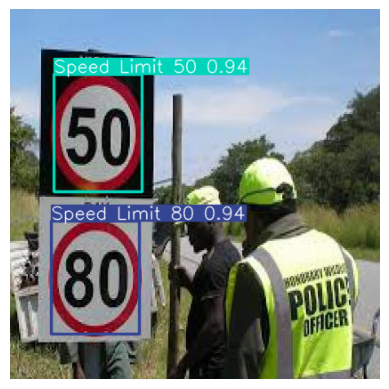

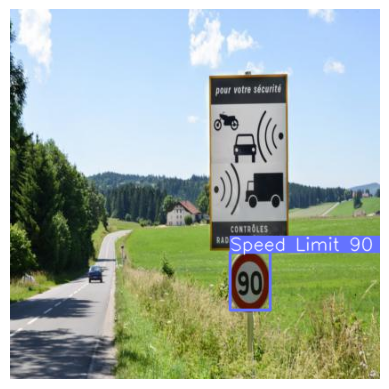

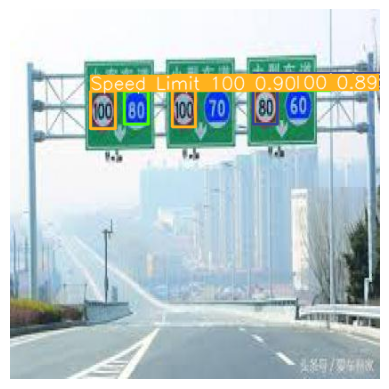

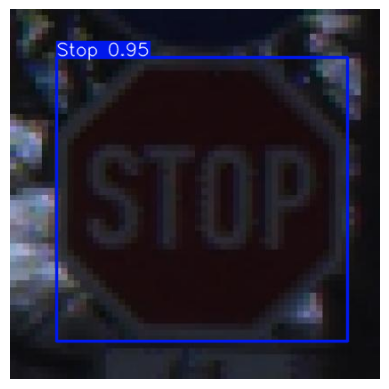

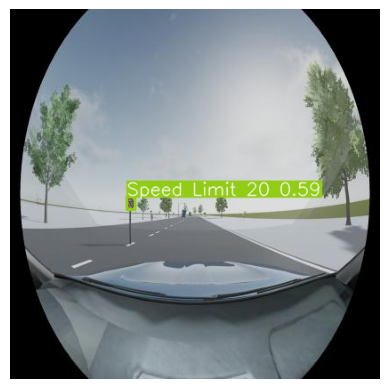

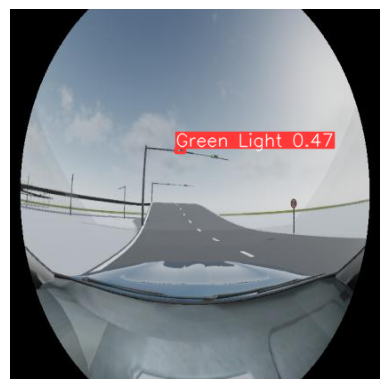

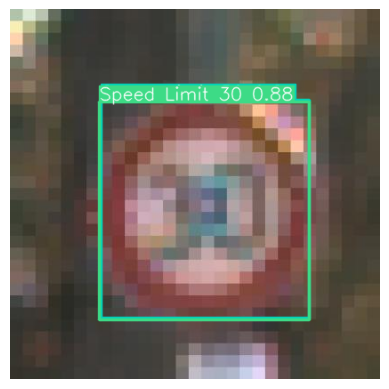

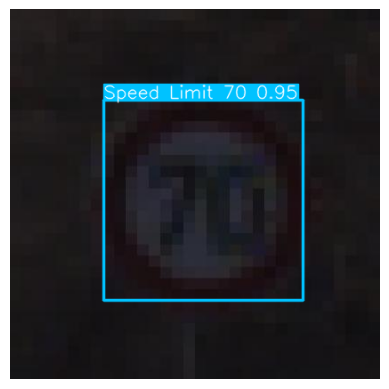

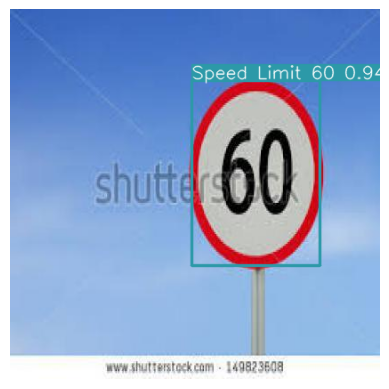

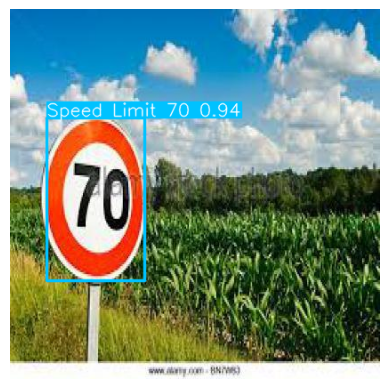

In [8]:
import matplotlib.pyplot as plt
for i, r in enumerate(output):
    img = Image.fromarray(r.plot()[..., ::-1])
    plt.axis('off')
    plt.imshow(img)
    plt.show()

In [9]:
model.export(format='onnx')

Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 320, 320) BCHW and output shape(s) (1, 19, 2100) (49.6 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 2.0s, saved as 'runs/detect/train/weights/best.onnx' (98.7 MB)

Export complete (3.7s)
Results saved to /kaggle/working/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=320  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.onnx imgsz=320 data=/kaggle/input/cardetection/data.yaml  
Visualize:       https://netron.app


'runs/detect/train/weights/best.onnx'